# **INDIAI - ARTIFICIAL INTELLIGENCE PROJECT**


##### **Group :** `Manav THONTIA`     |   `Delfina FERRERI`    |  `Mathis VESCHAMBRE`  |   `Shiva TARDIVEL`

***

# INTRODUCTION

- *Context of the project*
- The goal is to determine the key factors influencing employee resignation and suggest models to help reduce turnover.
- *Context of the problem*
- *We will be working with five sources of data in csv format...*
- *General stages of the project*

***

# DATA PREPROCESSING
- *General steps to follow*
- *Setting the environment*
- *Short description of libraries to be used*

In [4635]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os

## Loading the datasets

In [4636]:
os.chdir("./Datasets")

general_data = pd.read_csv('general_data.csv').copy()
employee_survey_data = pd.read_csv('employee_survey_data.csv').copy()
manager_survey_data = pd.read_csv('manager_survey_data.csv').copy()
in_time = pd.read_csv('in_time.csv').copy()
out_time = pd.read_csv('out_time.csv').copy()

os.chdir("..")

The datasets will be processed separately, then once clean thet'll be merged into one.

## Before merging all in one

### General Data

In [4637]:
general_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 24 entries, Age to YearsWithCurrManager
dtypes: float64(2), int64(14), object(8)
memory usage: 827.0+ KB


What can be observed from general data so far?
- Data from 4410 employees was gathered.
- Most of the attributes -exactly 14- are numerical, accepting either integers or floats as values.
- The other 5 attributes seem to be categorical.

Let's take a look at what the general data looks like:

In [4638]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


#### Dropping unnecesary attributes

Just by looking, we notice that:
- The attribute **Over18** is redundant: the more precise attribute **Age** is also present.
- The attribute **EmployeeCount** makes no sense, as each entry represents only one employee.
- We can divise two attributes that represent sensitive personal information, like **Gender** and **MaritalStatus**. We don't consider these relevant for the current analysis.

Let's now look at the metrics for each numerical attribute.

In [4639]:
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


- The attributes **EmployeeCount** and **StandardHours** have a standard deviation of 0.0, meaning that, for them, all entries have the same value -which are 1 and 8.0 respectively-. They are not useful to tell employees apart in any way.

We proceed by dropping the mentioned attributes, reducing the number of columns from 24 to 19.

In [4640]:
general_data.drop('Gender', axis=1,inplace=True)
general_data.drop('MaritalStatus', axis=1,inplace=True)
general_data.drop('Over18', axis=1,inplace=True)
general_data.drop('EmployeeCount', axis=1,inplace=True)
general_data.drop('StandardHours', axis=1,inplace=True)
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,60290,3.0,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,26790,2.0,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,2,Sales Executive,37020,0.0,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,1,Laboratory Technician,23980,0.0,14,1,10.0,2,9,7,8


### Survey Data: Employee and Manager

These datasets contain information about the employee's feelings and performance at work, both from it's point of view and from the point of view of its manager. At first sight, all attributes seem like they could be relevant for the current analysis.

In [4641]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [4642]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Given their similarity, it seems natural to merge these two into one dataset, using **EmployeeID** as the key attribute.

In [4643]:
survey_data = pd.merge(employee_survey_data,manager_survey_data,on="EmployeeID",how="outer")
survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,3,3
1,2,3.0,2.0,4.0,2,4
2,3,2.0,2.0,1.0,3,3
3,4,4.0,4.0,3.0,2,3
4,5,4.0,1.0,3.0,3,3


In [4644]:
survey_data.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000,4.000000,4.000000


### Schedule Data: In and Out Times

These datasets contain extremely detailed information on the times of entry and exit of each employee during the last 250 week-days.

Extra processing will be needed for these two sets of data, as this information on its own is not useful yet.

What new attributes for each employee could we extract from here?
- **Average of hours worked per day** (without taking into consideration those days when the employee was absent)
- **Number of absences** (days where there is no recorded time for entry and exit of the employee)
- **Schedule inconsistency** (how much the amount of hours worked each day varies, standard deviation for working hours)

But first, small peek at what the data looks like:

In [4645]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [4646]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


#### Dropping unnecesary attributes

- Some days seem to have N/A values for all employees! Among these, the first day of the year and Christmas.

- These non-workable days are not relevant for our analysis, as they don't provide information to tell employees apart.

- We proceed by identifying them and dropping the columns that match our description.

In [4647]:
nonsence_entries_in = pd.DataFrame(in_time.loc[:, in_time.isnull().sum() == len(in_time) ])
print(nonsence_entries_in.shape[1]," days with all null values for time of entrance.")
nonsence_entries_in

12  days with all null values for time of entrance.


,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4648]:
nonsence_entries_out = pd.DataFrame(out_time.loc[:, in_time.isnull().sum() == len(in_time)])
print(nonsence_entries_out.shape[1]," days with all null values for time of exit.")
nonsence_entries_out

12  days with all null values for time of exit.


,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is interesting to verify if the dates of non-workable days are consistent, meaning in time and out time data are well synchronized.

In [4649]:
print("The non-workable days in in_data are the same as in out_data?: ",nonsence_entries_in.equals(nonsence_entries_out))

The non-workable days in in_data are the same as in out_data?:  True


In [4650]:
in_time = in_time.drop(columns=nonsence_entries_in.columns)
out_time = out_time.drop(columns=nonsence_entries_out.columns)

By retiring the non-workable days, we reduced the columns with missing values by 12. Now let's look at other cases of this phenomena.

#### Treatment of missing values

Before acting on missing values, a function to quickly detect them:

In [4651]:
def DisplayMissingValues(data, data_name):
    
    df = pd.DataFrame(data)

    missing_counts = df.isnull().sum()
    missing_columns = missing_counts[missing_counts > 0]
    
    if missing_columns.empty:
        print("[0] No missing values in:",data_name,"\n")
        return
    print(len(missing_columns)," attributes with missing values in: ",data_name)
    print(missing_columns.to_string(),"\n")

In [4652]:
DisplayMissingValues(in_time, "in time")

249  attributes with missing values in:  in time
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
2015-01-08    243
2015-01-09    215
2015-01-12    239
2015-01-13    265
2015-01-15    236
2015-01-16    264
2015-01-19    228
2015-01-20    241
2015-01-21    240
2015-01-22    240
2015-01-23    249
2015-01-27    217
2015-01-28    212
2015-01-29    276
2015-01-30    208
2015-02-02    208
2015-02-03    206
2015-02-04    212
2015-02-05    211
2015-02-06    211
2015-02-09    224
2015-02-10    219
2015-02-11    226
2015-02-12    236
2015-02-13    212
2015-02-16    222
2015-02-17    244
2015-02-18    229
2015-02-19    217
2015-02-20    212
2015-02-23    241
2015-02-24    226
2015-02-25    234
2015-02-26    238
2015-02-27    236
2015-03-02    254
2015-03-03    228
2015-03-04    231
2015-03-06    242
2015-03-09    232
2015-03-10    243
2015-03-11    232
2015-03-12    219
2015-03-13    191
2015-03-16    219
2015-03-17    231
2015-03-18    237
2015-03-19    239
2015-03-20    2

In [4653]:

DisplayMissingValues(out_time, "out time")

249  attributes with missing values in:  out time
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
2015-01-08    243
2015-01-09    215
2015-01-12    239
2015-01-13    265
2015-01-15    236
2015-01-16    264
2015-01-19    228
2015-01-20    241
2015-01-21    240
2015-01-22    240
2015-01-23    249
2015-01-27    217
2015-01-28    212
2015-01-29    276
2015-01-30    208
2015-02-02    208
2015-02-03    206
2015-02-04    212
2015-02-05    211
2015-02-06    211
2015-02-09    224
2015-02-10    219
2015-02-11    226
2015-02-12    236
2015-02-13    212
2015-02-16    222
2015-02-17    244
2015-02-18    229
2015-02-19    217
2015-02-20    212
2015-02-23    241
2015-02-24    226
2015-02-25    234
2015-02-26    238
2015-02-27    236
2015-03-02    254
2015-03-03    228
2015-03-04    231
2015-03-06    242
2015-03-09    232
2015-03-10    243
2015-03-11    232
2015-03-12    219
2015-03-13    191
2015-03-16    219
2015-03-17    231
2015-03-18    237
2015-03-19    239
2015-03-20    

Too many missing values!
A treatment protocol must be chosen.

First, let's verify there are no _inconsistencies_ in the missing values. 

What do we mean by inconsistencies? Days where, for certain employee, either entry time or exit time is missing, but not both at the same time.
An occurrence of this kind would be a problem, as it would clearly not make sense for an employee to get in and then never get out, or viceversa.

In [4654]:
null_inconsistency_df = in_time.isnull() ^ out_time.isnull()    # XOR operation for each cell
print("The number of null inconsistencies is: ",(null_inconsistency_df == True).sum().sum())    # Counting inconsistencies

The number of null inconsistencies is:  0


No inconsistencies. This means in time and out time data are well synchronized.

Then for the days both entry and exit time are missing -which, as we have just observed, happens at least once for each recorded day- the decision to take it as an absent day, with zero hours of work, was taken. 

In [4655]:
def hours_since_midnight(input_time):
    return input_time.hour + input_time.minute / 60

In [4656]:
# convert to datetime format
first_column = in_time['Unnamed: 0']
in_time = in_time.apply(pd.to_datetime)
in_time = in_time.applymap(hours_since_midnight) 

# recover the first column
in_time.insert(0,"EmployeeID",first_column)
in_time.pop('Unnamed: 0')

in_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_61245/141373452.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  in_time = in_time.applymap(hours_since_midnight)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,9.716667,10.133333,9.900000,9.566667,9.850000,10.150000,9.700000,10.216667,10.016667,...,NaN,NaN,9.916667,10.066667,10.233333,10.183333,10.216667,10.050000,9.900000,10.200000
1,2,10.250000,10.350000,NaN,9.750000,10.150000,9.716667,10.000000,10.716667,9.616667,...,9.250000,10.616667,9.816667,10.550000,10.200000,NaN,9.516667,9.916667,10.533333,9.450000
2,3,10.283333,9.833333,10.233333,9.783333,10.050000,10.083333,10.050000,10.350000,9.916667,...,9.883333,10.250000,10.166667,9.733333,10.250000,10.116667,9.700000,9.716667,9.566667,10.466667
3,4,10.083333,9.933333,10.183333,9.616667,10.033333,10.133333,10.216667,9.883333,10.000000,...,9.900000,10.283333,9.966667,10.066667,10.183333,9.716667,9.866667,9.550000,10.300000,10.016667
4,5,10.466667,9.816667,9.750000,9.816667,10.316667,10.000000,10.483333,9.983333,10.100000,...,9.766667,9.966667,10.050000,10.166667,10.216667,9.733333,10.083333,10.500000,9.300000,9.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,9.333333,10.283333,10.433333,10.100000,9.750000,9.816667,9.616667,9.416667,9.483333,...,10.083333,10.016667,10.416667,10.266667,10.066667,9.750000,10.250000,10.166667,9.466667,10.000000
4406,4407,10.050000,NaN,9.733333,9.700000,10.000000,9.733333,10.116667,10.083333,10.300000,...,9.750000,9.450000,9.683333,9.833333,10.533333,9.783333,9.900000,10.216667,10.350000,10.150000
4407,4408,10.016667,9.550000,9.816667,10.466667,9.783333,10.016667,9.816667,9.783333,10.133333,...,10.016667,10.000000,9.850000,10.033333,9.966667,9.933333,9.983333,NaN,10.033333,10.050000
4408,4409,10.283333,10.033333,10.200000,10.200000,9.700000,NaN,10.000000,9.800000,9.066667,...,9.850000,9.900000,10.016667,10.166667,9.700000,9.933333,9.916667,9.900000,10.250000,9.933333


In [4657]:
first_column = out_time['Unnamed: 0']
out_time = out_time.apply(pd.to_datetime)
out_time = out_time.applymap(hours_since_midnight) 

out_time.insert(0,"EmployeeID",first_column)
out_time.pop('Unnamed: 0')

out_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_61245/382984850.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  out_time = out_time.applymap(hours_since_midnight)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16.933333,17.333333,17.316667,16.566667,17.133333,17.633333,16.966667,18.033333,17.366667,...,NaN,NaN,17.250000,17.450000,16.733333,17.783333,18.000000,17.366667,17.666667,17.283333
1,2,18.366667,17.800000,NaN,17.150000,17.566667,16.866667,17.600000,18.000000,17.233333,...,17.166667,18.516667,17.566667,18.266667,17.633333,NaN,17.133333,17.900000,18.516667,17.666667
2,3,16.983333,17.100000,16.633333,16.550000,17.400000,16.950000,17.466667,17.350000,17.350000,...,17.100000,17.033333,17.333333,16.533333,16.983333,16.966667,16.716667,17.150000,17.100000,17.250000
3,4,17.416667,17.233333,17.116667,16.533333,16.883333,17.316667,17.216667,17.183333,16.883333,...,17.350000,17.916667,16.816667,17.400000,17.600000,16.800000,17.316667,16.966667,17.666667,17.150000
4,5,18.516667,17.816667,17.433333,17.616667,17.983333,17.733333,18.850000,18.233333,18.350000,...,18.083333,17.866667,17.716667,18.116667,18.000000,17.983333,17.733333,18.783333,17.250000,17.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,17.450000,19.133333,18.833333,18.950000,17.966667,18.100000,17.966667,18.166667,17.833333,...,18.583333,18.100000,18.583333,18.550000,18.666667,18.350000,18.733333,19.233333,18.400000,18.500000
4406,4407,16.316667,NaN,15.116667,15.416667,16.200000,15.433333,16.166667,16.366667,16.316667,...,15.733333,15.383333,15.516667,15.750000,16.633333,15.783333,15.566667,16.783333,16.050000,16.300000
4407,4408,17.283333,17.133333,17.450000,18.450000,17.083333,17.033333,17.583333,17.250000,18.250000,...,17.700000,17.800000,17.716667,17.783333,17.716667,17.333333,17.716667,NaN,17.800000,18.133333
4408,4409,19.800000,19.616667,20.000000,19.583333,18.916667,NaN,19.300000,19.400000,18.550000,...,19.100000,19.866667,19.350000,19.533333,18.950000,19.616667,19.966667,18.916667,19.616667,19.550000


In [4658]:
def nan_to_zero(value):
    if pd.isna(value):
        value = 0
    return value

In [4659]:
in_time = in_time.applymap(nan_to_zero)
in_time

out_time = out_time.applymap(nan_to_zero)
out_time

/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_61245/51485806.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  in_time = in_time.applymap(nan_to_zero)
/var/folders/vw/cl6_2pns2m5f8sp50m3z244m0000gn/T/ipykernel_61245/51485806.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  out_time = out_time.applymap(nan_to_zero)


,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16.933333,17.333333,17.316667,16.566667,17.133333,17.633333,16.966667,18.033333,17.366667,...,0.000000,0.000000,17.250000,17.450000,16.733333,17.783333,18.000000,17.366667,17.666667,17.283333
1,2,18.366667,17.800000,0.000000,17.150000,17.566667,16.866667,17.600000,18.000000,17.233333,...,17.166667,18.516667,17.566667,18.266667,17.633333,0.000000,17.133333,17.900000,18.516667,17.666667
2,3,16.983333,17.100000,16.633333,16.550000,17.400000,16.950000,17.466667,17.350000,17.350000,...,17.100000,17.033333,17.333333,16.533333,16.983333,16.966667,16.716667,17.150000,17.100000,17.250000
3,4,17.416667,17.233333,17.116667,16.533333,16.883333,17.316667,17.216667,17.183333,16.883333,...,17.350000,17.916667,16.816667,17.400000,17.600000,16.800000,17.316667,16.966667,17.666667,17.150000
4,5,18.516667,17.816667,17.433333,17.616667,17.983333,17.733333,18.850000,18.233333,18.350000,...,18.083333,17.866667,17.716667,18.116667,18.000000,17.983333,17.733333,18.783333,17.250000,17.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,17.450000,19.133333,18.833333,18.950000,17.966667,18.100000,17.966667,18.166667,17.833333,...,18.583333,18.100000,18.583333,18.550000,18.666667,18.350000,18.733333,19.233333,18.400000,18.500000
4406,4407,16.316667,0.000000,15.116667,15.416667,16.200000,15.433333,16.166667,16.366667,16.316667,...,15.733333,15.383333,15.516667,15.750000,16.633333,15.783333,15.566667,16.783333,16.050000,16.300000
4407,4408,17.283333,17.133333,17.450000,18.450000,17.083333,17.033333,17.583333,17.250000,18.250000,...,17.700000,17.800000,17.716667,17.783333,17.716667,17.333333,17.716667,0.000000,17.800000,18.133333
4408,4409,19.800000,19.616667,20.000000,19.583333,18.916667,0.000000,19.300000,19.400000,18.550000,...,19.100000,19.866667,19.350000,19.533333,18.950000,19.616667,19.966667,18.916667,19.616667,19.550000


In [4660]:
DisplayMissingValues(in_time,"in time")
DisplayMissingValues(out_time,"out time")

[0] No missing values in: in time 

[0] No missing values in: out time 



No missing values, as we replaced successfully all occurrences of NaN by zero.

Now the two will be combined into one dataset containing the previously mentionned attributes, and using **EmployeeID** as the key.

In [4661]:

time_data = pd.DataFrame(index=in_time.index, columns=['EmployeeID','AvgWorkedHours','ScheduleInconsistency','Absences'])

# Function to calculate mean time in hours
def calculate_working_hours(e_id,row_in,row_out):

    working_hours_for_employee = []
    absence_counter = 0
    for index in range(1,len(in_time.columns)):    # Skipping EmployeeID column
        check_in = row_in.iloc[index]
        check_out = row_out.iloc[index]
        hours_worked = (check_out - check_in)
        if (hours_worked == 0):
            absence_counter+=1
        else:
            working_hours_for_employee.append(hours_worked)
    mean_time = np.mean(working_hours_for_employee)
    std = np.std(working_hours_for_employee)
    return e_id+1, mean_time, std, absence_counter



# Add new attributes
for i in range(0,len(in_time)):
    row_in = in_time.iloc[i]
    row_out = out_time.iloc[i]

    # Call the function and unpack the results
    e_id, mean_time, schedule_inconsistency, absence_counter = calculate_working_hours(i, row_in, row_out)
    
    # Assign the results to the new DataFrame 'time_data'
    pos = i
    time_data.at[pos, 'EmployeeID'] = e_id
    time_data.at[pos, 'AvgWorkedHours'] = mean_time
    time_data.at[pos, 'ScheduleInconsistency'] = schedule_inconsistency
    time_data.at[pos, 'Absences'] = absence_counter


In [4662]:
time_data.head()

,EmployeeID,AvgWorkedHours,ScheduleInconsistency,Absences
0,1,7.374138,0.281756,17
1,2,7.717726,0.312333,13
2,3,7.013499,0.310978,7
3,4,7.193475,0.283085,14
4,5,8.006259,0.30018,4


In [4663]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             4410 non-null   object
 1   AvgWorkedHours         4410 non-null   object
 2   ScheduleInconsistency  4410 non-null   object
 3   Absences               4410 non-null   object
dtypes: object(4)
memory usage: 137.9+ KB


In [4664]:
def DisplayMetricsForAttribute(data,attribute):
    print()
    print("Metrics for",attribute)
    print("MIN: ",data[attribute].min())
    print("MAX: ",data[attribute].max())
    print("AVG: ",data[attribute].mean())
    print("STD: ",data[attribute].std())

In [4665]:
DisplayMetricsForAttribute(time_data,"AvgWorkedHours")
DisplayMetricsForAttribute(time_data,"ScheduleInconsistency")
DisplayMetricsForAttribute(time_data,"Absences")


Metrics for AvgWorkedHours
MIN:  5.950881057268722
MAX:  11.031410256410256
AVG:  7.700784836238567
STD:  1.3402092792425775

Metrics for ScheduleInconsistency
MIN:  0.2543823008140383
MAX:  0.343310080526662
AVG:  0.29901643922321447
STD:  0.013692602355601671

Metrics for Absences
MIN:  1
MAX:  24
AVG:  12.73469387755102
STD:  5.503779023726594


## Merging all into one dataset

It is time to combine all the data into one unique dataset, which we will call **merged_data**.

After that, we will assemble the full pipeline to properly finish the preprocessing of the data from this point on.

In [4666]:
merge_key = "EmployeeID"
merged_data = pd.merge(general_data, survey_data, on=merge_key, how="outer")
merged_data = pd.merge(merged_data, time_data, on=merge_key, how="outer")       # time data is missing

# we rearrange the order of the columns for an easier read
columns_order = ["EmployeeID"] + ["Attrition"] + [col for col in merged_data.columns if (col != "EmployeeID" and col != "Attrition")] 
merged_df = merged_data[columns_order]
merged_df.to_csv("merged_data.csv", index=True)
merged_df


,EmployeeID,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgWorkedHours,ScheduleInconsistency,Absences
0,1,No,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,...,0,0,3.0,4.0,2.0,3,3,7.374138,0.281756,17
1,2,Yes,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,...,1,4,3.0,2.0,4.0,2,4,7.717726,0.312333,13
2,3,No,32,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,...,0,3,2.0,2.0,1.0,3,3,7.013499,0.310978,7
3,4,No,38,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,...,7,5,4.0,4.0,3.0,2,3,7.193475,0.283085,14
4,5,No,32,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,...,0,4,4.0,1.0,3.0,3,3,8.006259,0.30018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,No,42,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,...,0,2,4.0,1.0,3.0,3,3,8.522222,0.300396,6
4406,4407,No,29,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,...,0,2,4.0,4.0,3.0,2,3,6.093084,0.279036,8
4407,4408,No,25,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,...,1,2,1.0,3.0,3.0,3,4,7.706926,0.311805,18
4408,4409,No,42,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,...,7,8,4.0,1.0,3.0,2,3,9.492324,0.325315,8


In [4667]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   object 
 1   Attrition                4410 non-null   object 
 2   Age                      4410 non-null   int64  
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4391 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

## After merging

To summarize, so far we managed to preprocess the datasets separately, dropping unnecessary attributes and creating new, more relevant ones, from otherwise obtuse information—like we did with in_time and out_time—.

Now that we have the complete, merged dataset, it's finally time to adress the missing values.

### Treatment of missing values

In [4668]:
DisplayMissingValues(merged_df,"data")

5  attributes with missing values in:  data
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38 



#### Ethical Dilema

We can identify two groups of attributes among the ones with missing values. The subjective ones and the non-subjective ones. 

As in the subjective ones, we want to avoid the unethical decision of _speaking_ for people's opinions. These are *JobSatisfaction*, *EnvironmentSatisfaction* and *WorkLifeBalance*.

For the non-subjective ones, it's good to use tecniques from ML, like Linear Regression and Random Forest, in order to accurately infer missing values. This doesn't pose an ethical issue to us. These attributes are *TotalWorkingYears* and *YearsAtCompany*.

#### Non-subjective attributes

We will explore different ML tecniques and test their performance to decide on the best one:
1. Replacing by the mean
2. Linear Regression
3. KNN
4. Random Forest

Tecnique [1] is Univariable, as it only computes data from the same attribute that it tries to infer, so it is not a Machine Learning technique because it calculates a value and completes missing values with it in a deterministic way. 

The others are Multivariable Machine Learning techniques that can compute more than one attribute in order to achieve this goal, which makes them powerful, well-informed tools with a tendency to give more accurate results.

In [4669]:
# Replace by the mean
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')


**How to pick the right attributes to train the regression models?**

The way to do this is to study the correlation between the rest of the attributes and the target attribute, displaying only the ones that are considered to be highly related. We propose one threshold for each of the two target attributes involved and display only the ones whose correlation to them falls outside the range (-threshold, threshold).

In [4670]:
threshold_TWY = 0.40
threshold_NCW = 0.15

correlations = merged_df.corr(numeric_only=True)
correlations_TWY = correlations['TotalWorkingYears'][(correlations['TotalWorkingYears'] < -threshold_TWY) | (correlations['TotalWorkingYears'] > threshold_TWY)].sort_values(ascending=False)
print(correlations_TWY,"\n")

correlations = merged_df.corr(numeric_only=True)
correlations_NCW = correlations['NumCompaniesWorked'][(correlations['NumCompaniesWorked'] < -threshold_NCW) | (correlations['NumCompaniesWorked'] > threshold_NCW)].sort_values(ascending=False)
print(correlations_NCW)

TotalWorkingYears          1.000000
Age                        0.680661
YearsAtCompany             0.627703
YearsWithCurrManager       0.458800
YearsSinceLastPromotion    0.404444
Name: TotalWorkingYears, dtype: float64 

NumCompaniesWorked    1.000000
Age                   0.299243
TotalWorkingYears     0.238807
Name: NumCompaniesWorked, dtype: float64


In [4671]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_scores = {}

def EvaluateModel(data,attribute,model,model_name,features=None):

    # Separated rows with or not missing values for the attribute
    df_missing = data[data[attribute].isna()].copy()
    df_complete = data.dropna(subset=[attribute]).copy()

    X = df_complete[features]
    y = df_complete[attribute]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Use scaled for the models that need it
    if model_name in ['Ridge Regression', 'Lasso Regression', 'K-Nearest Neighbors', 'Linear Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred_test = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)

    # Calculate error metrics for the test set
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    model_scores[model_name] = r2

    return [mse,rmse,mae,r2], df_missing


In [4672]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=100),
    'Gradient Boosting' : GradientBoostingRegressor(n_estimators=100,random_state=42)
}

results = {}

# Loop through each model, train and evaluate
features = ['Age', 'YearsAtCompany', 'YearsWithCurrManager', 'YearsSinceLastPromotion']
for model_name, model in models.items():
    results_TWY, missing_data_TWY = EvaluateModel(merged_df,'TotalWorkingYears',model,model_name,features)
    results_NCW, missing_data_NCW = EvaluateModel(merged_df,'NumCompaniesWorked',model,model_name,features)
    results[(model_name, 'TotalWorkingYears')] = results_TWY
    results[(model_name, 'NumCompaniesWorked')] = results_NCW
    
# Convert results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(
    results, 
    orient='index', 
    columns=['MAE', 'MSE', 'RMSE', 'R²']
)

results_df.index = pd.MultiIndex.from_tuples(results.keys(), names=["Model", "Attribute"])

# Display the DataFrame
results_df.head(10)


MAE       MSE      RMSE  \
Model               Attribute                                           
Linear Regression   TotalWorkingYears   21.233423  4.607974  3.191894   
                    NumCompaniesWorked   5.251583  2.291633  1.800420   
Ridge Regression    TotalWorkingYears   21.233959  4.608032  3.191740   
                    NumCompaniesWorked   5.251636  2.291645  1.800475   
Lasso Regression    TotalWorkingYears   21.265633  4.611468  3.188177   
                    NumCompaniesWorked   5.314212  2.305258  1.829447   
Random Forest       TotalWorkingYears    6.952516  2.636762  1.346966   
                    NumCompaniesWorked   2.243348  1.497781  0.884452   
K-Nearest Neighbors TotalWorkingYears   20.783880  4.558934  2.976254   
                    NumCompaniesWorked   5.267286  2.295057  1.794027   

                                              R²  
Model               Attribute                     
Linear Regression   TotalWorkingYears   0.645580  
                    NumCompaniesWorked  0.157128  
Ridge Regression    TotalWorkingYears   0.645571  
                    NumCompaniesWorked  0.157119  
Lasso Regression    TotalWorkingYears   0.645042  
                    NumCompaniesWorked  0.147076  
Random Forest       TotalWorkingYears   0.883951  
                    NumCompaniesWorked  0.639945  
K-Nearest Neighbors TotalWorkingYears   0.653083  
                    NumCompaniesWorked  0.154607

After implementing and comparing various models through the calculation of different metrics, we use the Coefficient of Determination (R²), which is independent from the units, to decide which one is the best. 

R² essentially tells you how much better (or worse) your model is compared to using the mean of the target variable as a prediction. The best case is an R² equal to 1 (perfect fit).

The best model will be the one with the highest R² value:

In [4673]:
# Find the model with the best R² score
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

print(f"\nThe best model is: {best_model_name} with R² score of {model_scores[best_model_name]}")
# Reset the index to separate Model and Attribute
results_df.index = pd.MultiIndex.from_tuples(results.keys(), names=["Model", "Attribute"])


The best model is: Random Forest with R² score of 0.6399454627463269


In [4674]:

# Now use the best model to predict the missing values: TotalWorkingYears

# Fill missing values in df_missing using the best model
X_missing = missing_data_TWY[features]
y_missing_pred = best_model.predict(X_missing)

# Replace missing values in the 'TotalWorkingYears' column with the predicted values
missing_data_TWY['TotalWorkingYears'] = np.round(y_missing_pred)

# Update the original DataFrame with the imputed values
merged_df.loc[merged_df['TotalWorkingYears'].isna(), 'TotalWorkingYears'] = missing_data_TWY['TotalWorkingYears']

In [4675]:
# Now use the best model to predict the missing values: NumCompaniesWorked

# Fill missing values in df_missing using the best model
X_missing = missing_data_NCW[features]
y_missing_pred = best_model.predict(X_missing)

# Replace missing values in the 'TotalWorkingYears' column with the predicted values
missing_data_NCW['NumCompaniesWorked'] = np.round(y_missing_pred)

# Update the original DataFrame with the imputed values
merged_df.loc[merged_df['NumCompaniesWorked'].isna(), 'NumCompaniesWorked'] = missing_data_NCW['NumCompaniesWorked']

In [4676]:
DisplayMissingValues(merged_df,"merged data")

3  attributes with missing values in:  merged data
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38 



The missing values have been succesfully replaced using Random Forest Regression.

Time to move on to subjective attributes.

In [4677]:
non_subjective_attributes = ['TotalWorkingYears','NumCompaniesWorked']

#### Subjective Attributes

For these attributes, different options came up. As we agreed it wasn't ethical to use other employees' data to infer a missing opinion, the main viable options were:
1. Removing the attributes with missing values.
2. Removing the rows with missing values.
3. Replacing the missing values for a neutral one.

In [4678]:
subjective_attributes = ['JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance']

In [4679]:
merged_df[subjective_attributes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JobSatisfaction          4390 non-null   float64
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3)
memory usage: 103.5 KB


In [4680]:
# 1: droppint missing attributes
missing_values = merged_df[subjective_attributes].isnull().sum().sum()
porcentage_missing_values = (100/len(time_data)*missing_values)
print(missing_values,"is the total number of missing values.")
print(f"That represents {porcentage_missing_values:.2f}% of the data.")

83 is the total number of missing values.
That represents 1.88% of the data.


[1] is discarded, as we don't know yet if these attributes will be highly correlated with the output, and the missing values are too low in percentage to justify deleting three attributes without knowing how relevant they will be for the final prediction.

In [4681]:
# 2: dropping missing values
missing_rows_count = merged_df[subjective_attributes].isnull().any(axis=1).sum()
porcentage_missing_rows = (100/len(time_data)*missing_rows_count)
print(missing_rows_count,"rows would be dropped.")
print(f"That represents {porcentage_missing_rows:.2f}% of the data.")

83 rows would be dropped.
That represents 1.88% of the data.


[2] is viable, as 83 rows represent 1.88% of the total data. However, we still lose data.

In [4682]:
#3: replacing by neutral value
from sklearn.impute import SimpleImputer

mean_values = merged_df[subjective_attributes].mean()
std = merged_df[subjective_attributes].std()

neutral_imputer = SimpleImputer(strategy='constant', fill_value=3.0)
merged_df[subjective_attributes] = neutral_imputer.fit_transform(merged_df[subjective_attributes])

DisplayMissingValues(merged_df,"merged data")

[0] No missing values in: merged data 



Option [3] could be seen as unethical as we tecnically still _speak_ for people: we say their opinion is 3.0 -- meaning, neutral -- but we don't consider why they didn't answer the survey given that we have no way to know this.

We succesfully replaced the missing values with a constant of 3.0, which is a neutral opinion in a scale from 1 to 5. We group people with no opinion with this value, regardless of the reason why they had no opinion. The team concluded that this was the best alternative.

### Treatment of outliers

The first thing we will do is treat the outliers in numerical attributes.

In [4683]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   object 
 1   Attrition                4410 non-null   object 
 2   Age                      4410 non-null   int64  
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4410 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

In [4684]:
numerical_attributes = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_attributes = merged_df.select_dtypes(include=['object','category']).columns.tolist()

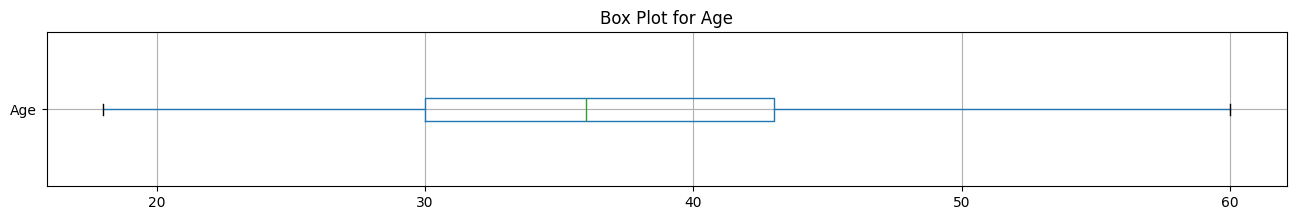

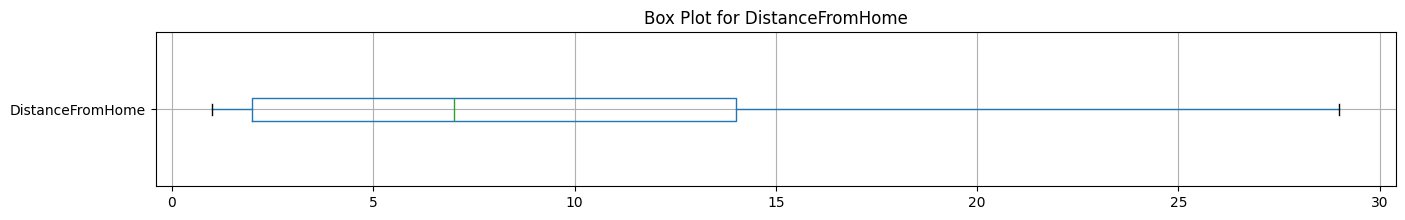

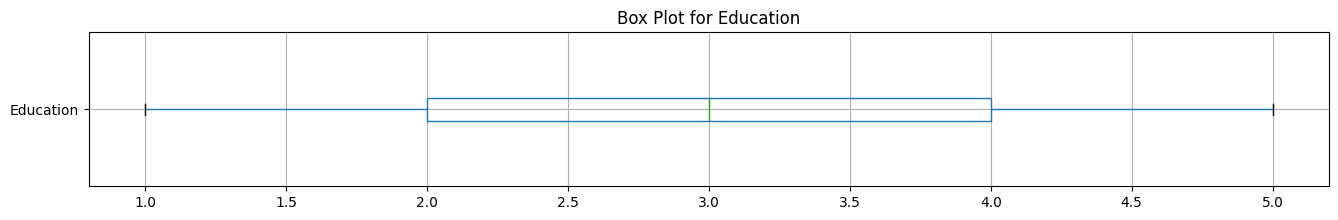

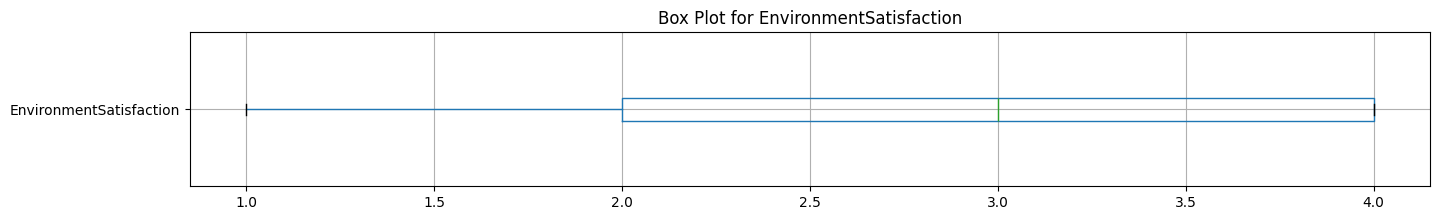

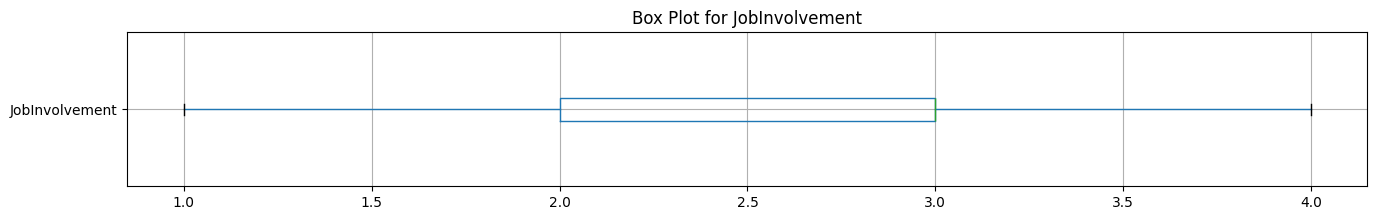

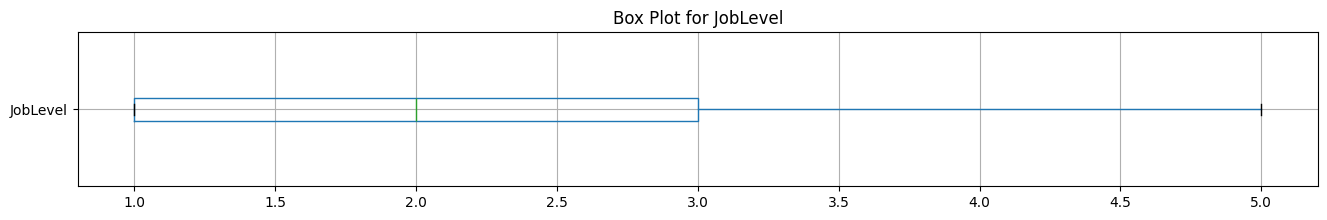

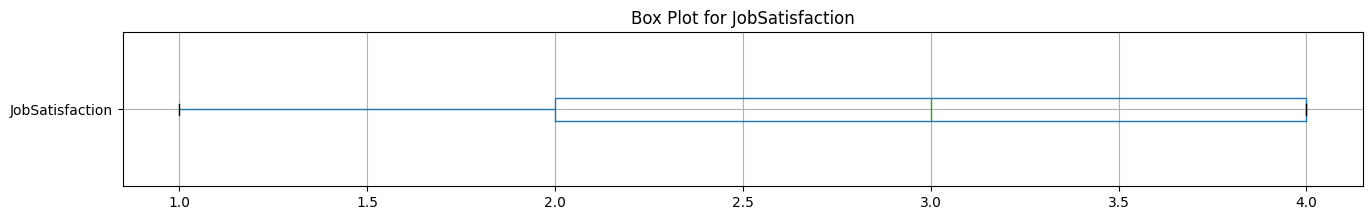

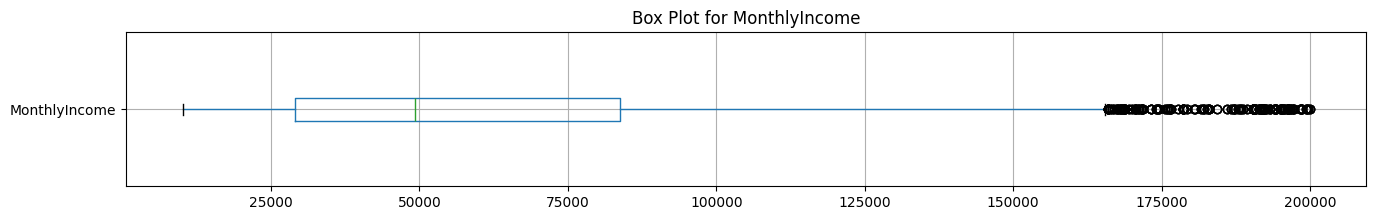

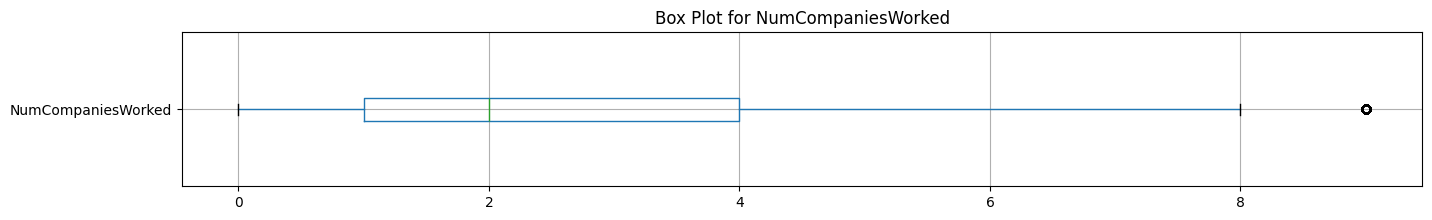

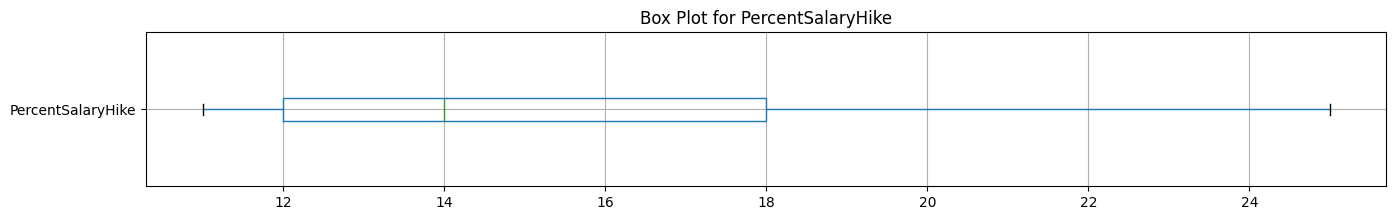

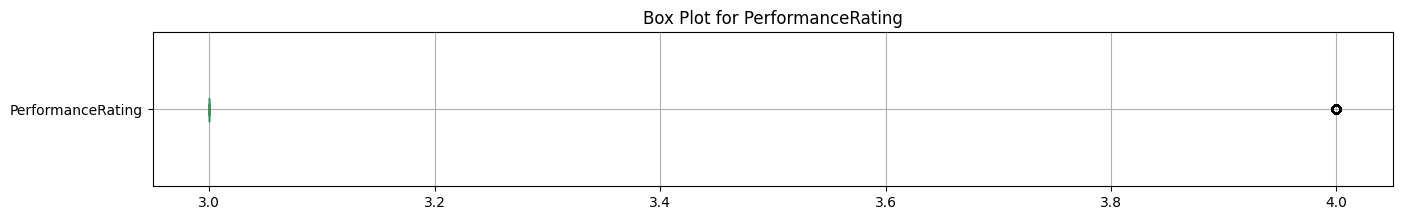

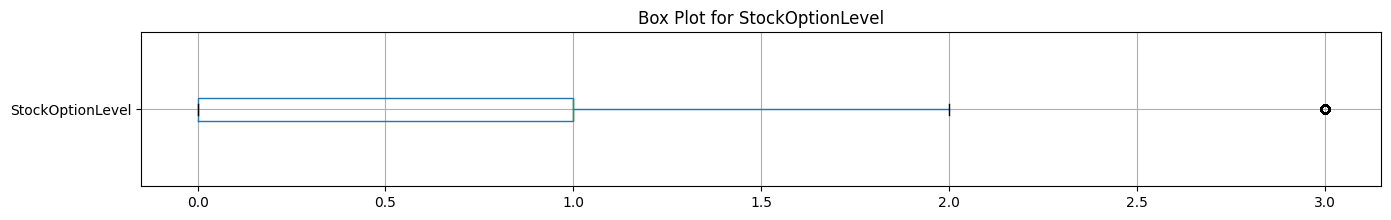

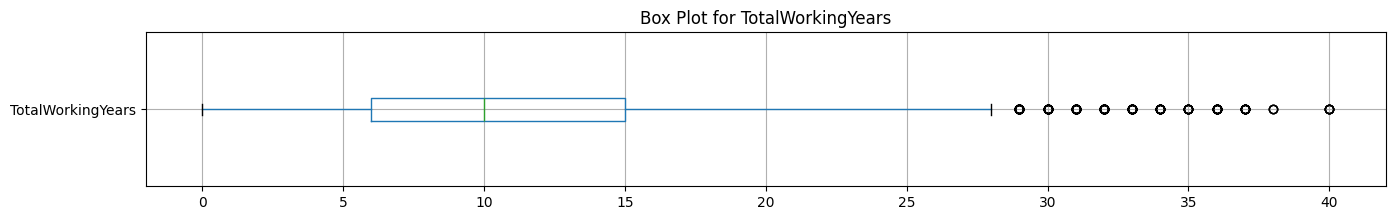

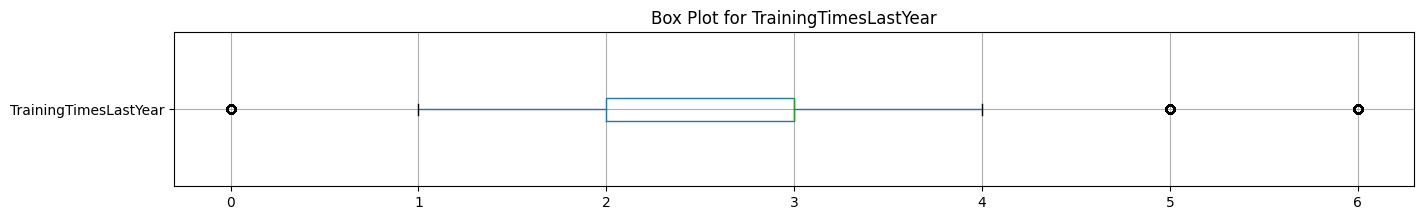

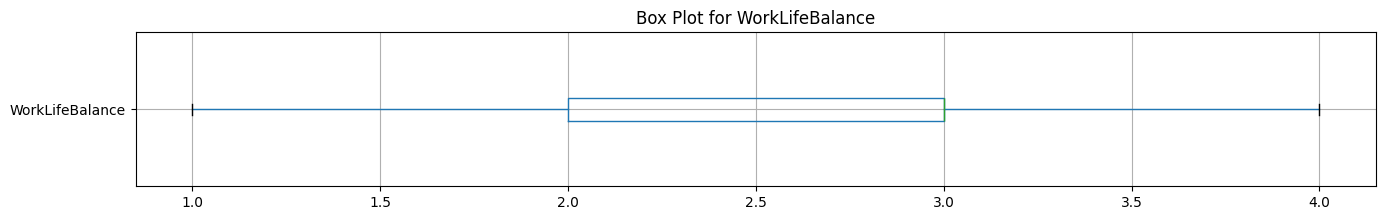

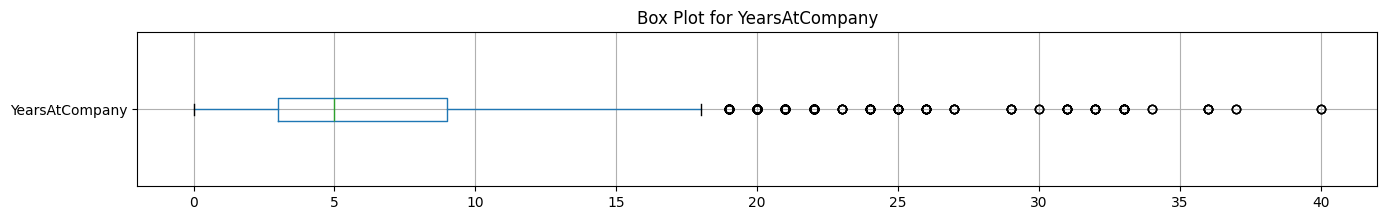

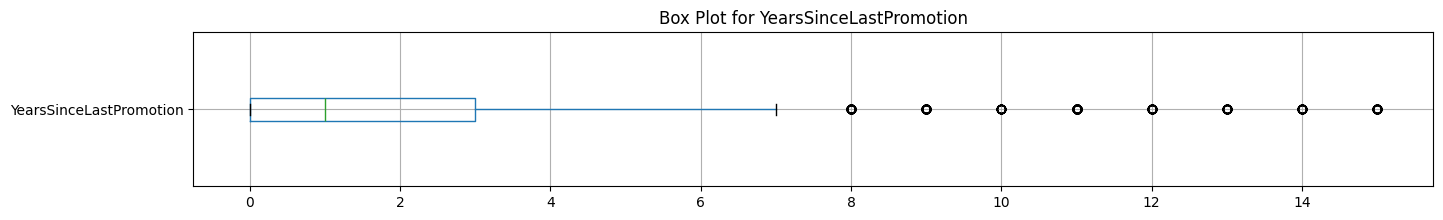

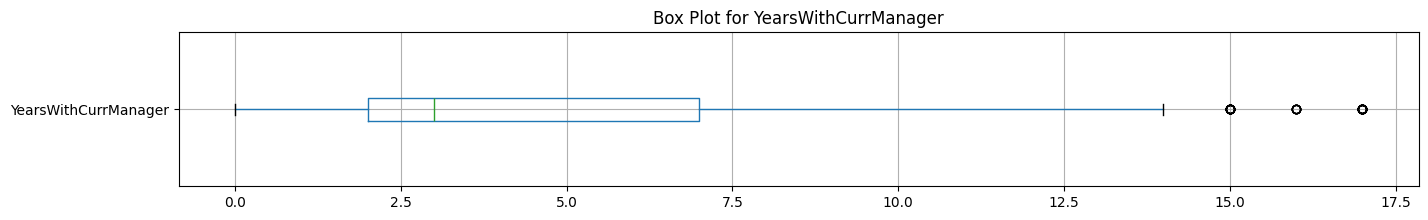

Categorical attributes are excluded from this treatment.
Categorical features ['EmployeeID', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'AvgWorkedHours', 'ScheduleInconsistency', 'Absences']

With a threshold value of 1.5 , the outliers detected are:
MonthlyIncome: 342 outliers (7.76%)
NumCompaniesWorked: 156 outliers (3.54%)
PerformanceRating: 678 outliers (15.37%)
StockOptionLevel: 255 outliers (5.78%)
TotalWorkingYears: 189 outliers (4.29%)
TrainingTimesLastYear: 714 outliers (16.19%)
YearsAtCompany: 312 outliers (7.07%)
YearsSinceLastPromotion: 321 outliers (7.28%)
YearsWithCurrManager: 42 outliers (0.95%)

No outliers in ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PercentSalaryHike', 'WorkLifeBalance']


In [4685]:
def DisplayOutliers(numerical_attributes,categorical_attributes,threshold=1.5):
    numeric_df = merged_df.select_dtypes(include=[np.number])

    # Calculate the IQR for each numeric column
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the whiskers
    lower_whisker = Q1 - threshold * IQR
    upper_whisker = Q3 + threshold * IQR

    # Create a box plot for each column and count outliers
    outliers_count = {}

    for column in numeric_df.select_dtypes(include=[np.number]).columns.difference(categorical_attributes):
        plt.figure(figsize=(16, 2))
        numeric_df.boxplot(column=column, vert=False, whis=threshold)
        plt.title(f'Box Plot for {column}')
        plt.show()
        
        # Count outliers
        lower_outliers = (numeric_df[column] < lower_whisker[column]).sum()
        upper_outliers = (numeric_df[column] > upper_whisker[column]).sum()
        outliers_count[column] = lower_outliers + upper_outliers

    # Display the outliers count

    print("Categorical attributes are excluded from this treatment.\nCategorical features",categorical_attributes)
    print("\nWith a threshold value of",threshold,", the outliers detected are:")
    no_outliers = []
    for column, count in outliers_count.items():
        outlier_percentage = (count / numeric_df.shape[0]) * 100
        if (outlier_percentage > 0):
            print(f'{column}: {count} outliers ({outlier_percentage:.2f}%)')
        else:
            no_outliers.append(column)
    print("\nNo outliers in",no_outliers)

DisplayOutliers(numerical_attributes,categorical_attributes)

Once the outliers were detected, we have to decide on what to do with them.

Main strategies:
1. Ignore them.
2. Categorize attributes.
3. Set outliers to lower/upper bounds.

In [4686]:
# strategy #2

def Years_Cat_transf_value(column):
    bins = [0, 2, 9, 14, 19, 41]
    labels = ['[0-2]', '[3-9]', '[10-14]', '[15-19]', '[20-40]']
    column = pd.to_numeric(column, errors='coerce')
    return pd.cut(column, bins=bins, labels=labels, right=False)

def Days_Cat_transf_value(column):
    bins = [-1, 0, 2, 4, float('inf')]
    labels = ['0 days', '1-2 days', '3-4 days', '5+ days']
    column = pd.to_numeric(column, errors='coerce')
    return pd.cut(column, bins=bins, labels=labels, right=False)

def Drop_column(column):
    if column in merged_df.columns:
        merged_df.drop(column, axis=1, inplace=True)
    return merged_df


# strategy #3

def Cap_value(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return column


# For attributes that include years: strategy #3
merged_df['TotalWorkingYears'] = Years_Cat_transf_value(merged_df['TotalWorkingYears'])
merged_df['YearsAtCompany'] = Years_Cat_transf_value(merged_df['YearsAtCompany'])
merged_df['YearsSinceLastPromotion'] = Years_Cat_transf_value(merged_df['YearsSinceLastPromotion'])
merged_df['YearsWithCurrManager'] = Years_Cat_transf_value(merged_df['YearsWithCurrManager'])
# For other attributes: strategies #2 and #3
merged_df['TrainingTimesLastYear'] = Days_Cat_transf_value(merged_df['TrainingTimesLastYear'])
merged_df['MonthlyIncome'] = Cap_value(merged_df['MonthlyIncome'])
merged_df['NumCompaniesWorked'] = Cap_value(merged_df['NumCompaniesWorked'])
#merged_df = Drop_column('StockOptionLevel')

In [4687]:
merged_df[['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear', 'MonthlyIncome', 'NumCompaniesWorked']].head()

,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,MonthlyIncome,NumCompaniesWorked
0,[0-2],[0-2],[0-2],[0-2],5+ days,131160.0,1.0
1,[3-9],[3-9],[0-2],[3-9],3-4 days,41890.0,0.0
2,[3-9],[3-9],[0-2],[3-9],3-4 days,165835.0,1.0
3,[10-14],[3-9],[3-9],[3-9],5+ days,83210.0,3.0
4,[10-14],[3-9],[0-2],[3-9],3-4 days,23420.0,4.0


In [4688]:
merged_df.head()

,EmployeeID,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgWorkedHours,ScheduleInconsistency,Absences
0,1,No,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,...,[0-2],[0-2],3.0,4.0,2.0,3,3,7.374138,0.281756,17
1,2,Yes,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,...,[0-2],[3-9],3.0,2.0,4.0,2,4,7.717726,0.312333,13
2,3,No,32,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,...,[0-2],[3-9],2.0,2.0,1.0,3,3,7.013499,0.310978,7
3,4,No,38,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,...,[3-9],[3-9],4.0,4.0,3.0,2,3,7.193475,0.283085,14
4,5,No,32,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,...,[0-2],[3-9],4.0,1.0,3.0,3,3,8.006259,0.30018,4


In [4689]:
numerical_attributes = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_attributes = merged_df.select_dtypes(include=['object','category']).columns.tolist()

In [4690]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   object  
 1   Attrition                4410 non-null   object  
 2   Age                      4410 non-null   int64   
 3   BusinessTravel           4410 non-null   object  
 4   Department               4410 non-null   object  
 5   DistanceFromHome         4410 non-null   int64   
 6   Education                4410 non-null   int64   
 7   EducationField           4410 non-null   object  
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MonthlyIncome            4410 non-null   float64 
 11  NumCompaniesWorked       4410 non-null   float64 
 12  PercentSalaryHike        4410 non-null   int64   
 13  StockOptionLevel         4410 non-null   int64   
 14  TotalWor

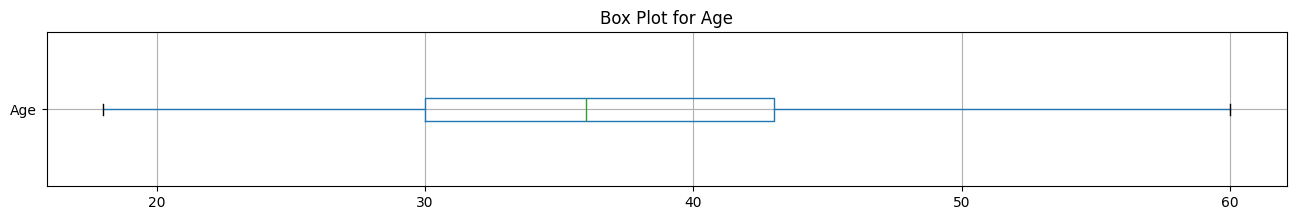

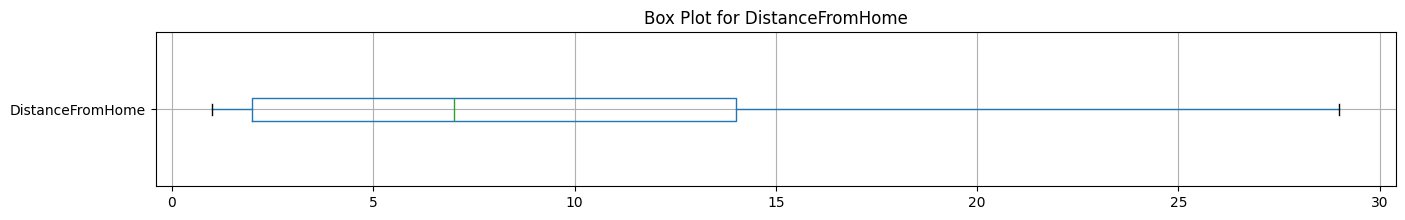

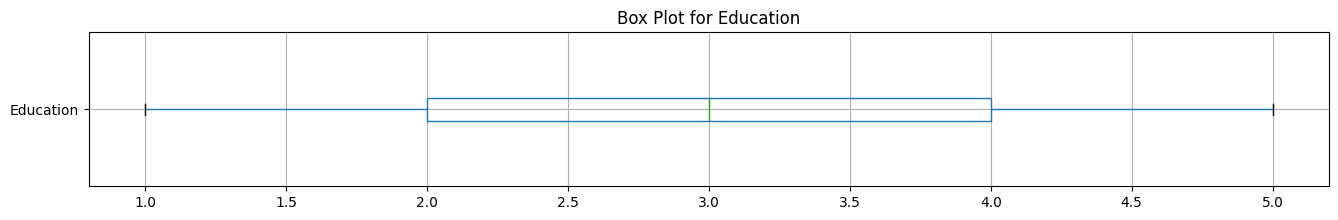

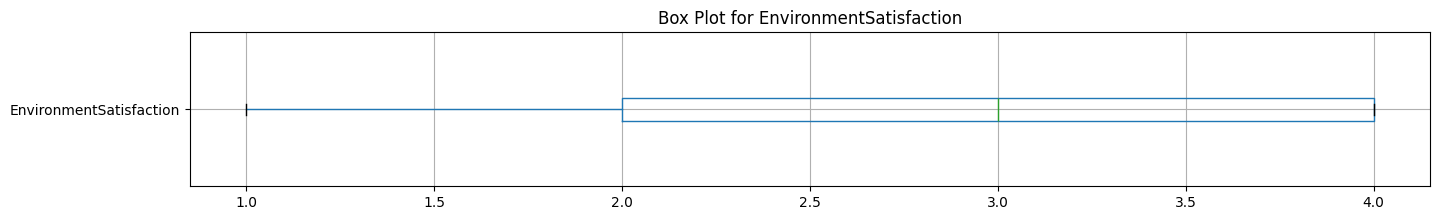

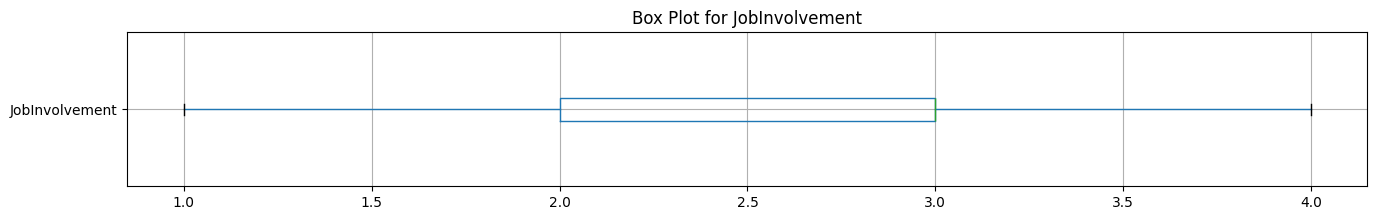

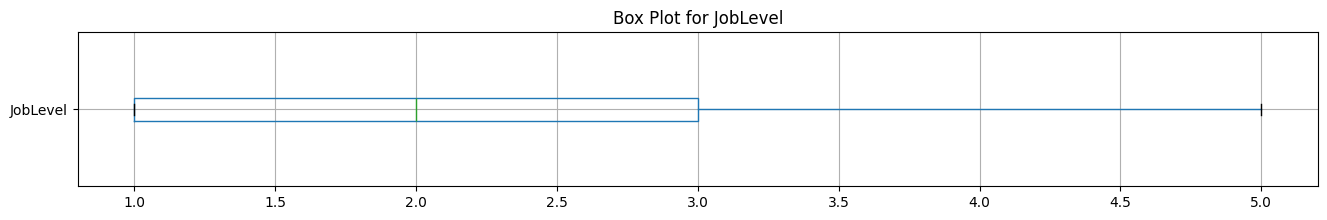

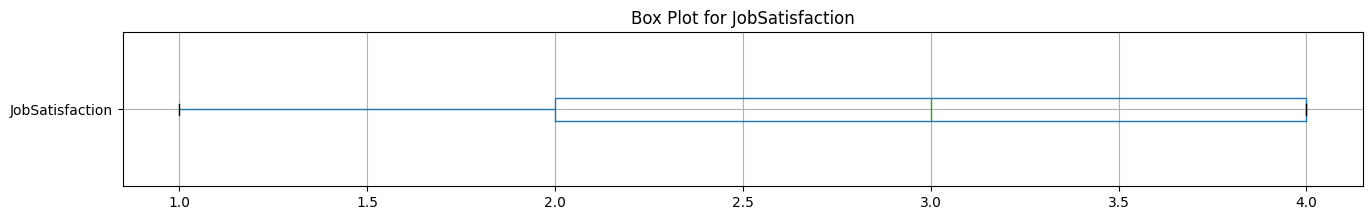

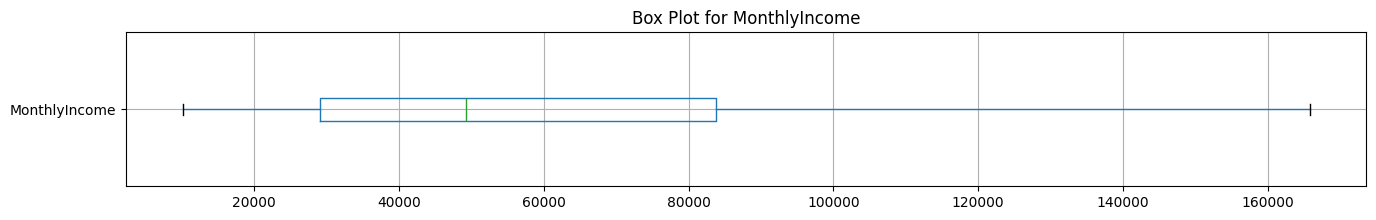

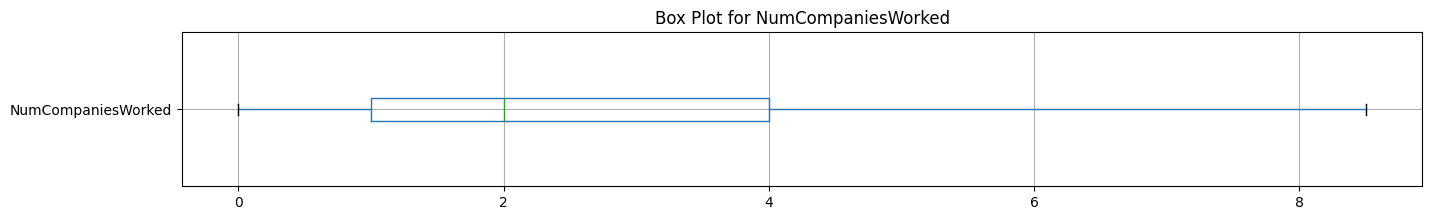

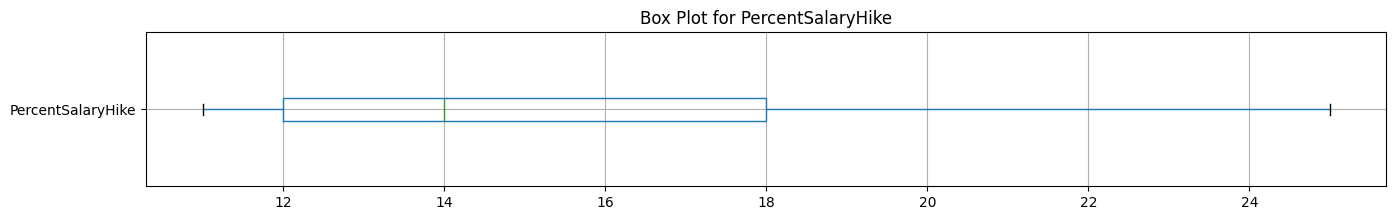

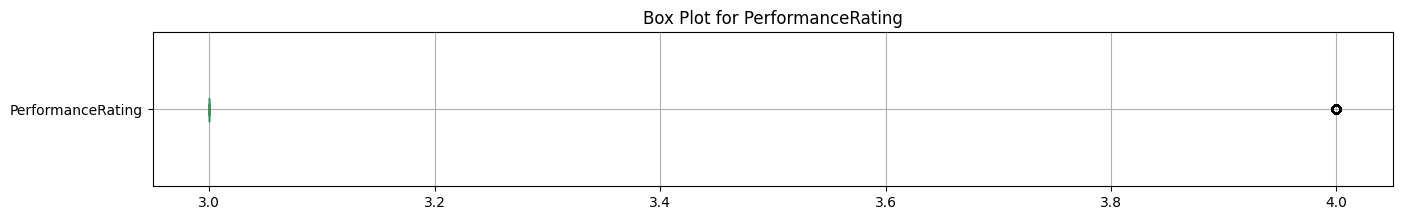

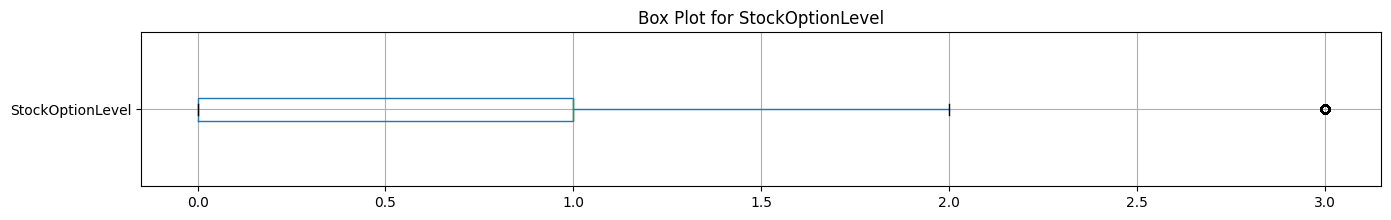

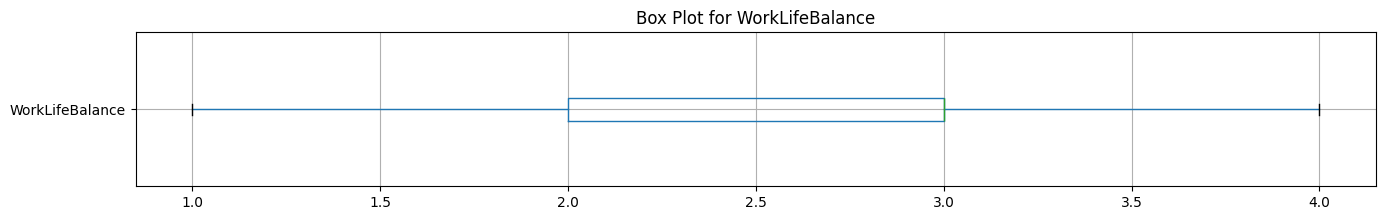

Categorical attributes are excluded from this treatment.
Categorical features ['EmployeeID', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AvgWorkedHours', 'ScheduleInconsistency', 'Absences']

With a threshold value of 1.5 , the outliers detected are:
PerformanceRating: 678 outliers (15.37%)
StockOptionLevel: 255 outliers (5.78%)

No outliers in ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'WorkLifeBalance']


In [4691]:
DisplayOutliers(numerical_attributes,categorical_attributes)

We still have, allegedly, outliers in PerformanceRating. Let's take a closer look:

In [4692]:
merged_df['PerformanceRating'].describe()

count    4410.000000
mean        3.153741
std         0.360742
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

Actually, when we analyze the box plot and the description, we notice that:
- There are actually only two values present for this feature: 3.0 and 4.0.
- For this attribute, we use strategy [1]: ignore outliers. 
- We ignore those outliers as they are a _false alarm_ that rises from the fact that PerformanceRating is a numerical feature that could be interpretted as categorical.

___
### Treatment of categorical values

Now it's time to encode categorical data into numerical attributes.

To be more precise: we have to encode the values with the 'object' or 'categorical' datatype using either OneHotEncoder, OrdinalEncoder or LabelEncoder. The choice will vary according to the nature of each attribute.

- OrdinalEncoder works best for ordinal attributes, where the categories have a meaningful order or hierarchy.
- OneHotEncoder is rather used when the categories are nominal, with no implicit order, and you want to avoid assigning arbitrary numerical values.
- LabelEncoder encodes categories into integers in a single column, typically for target variables or labels. 

Something worth mentioning is that some attributes, like EmployeeID, are already encoded as each value already represents a distinct category.

Also the previously mentioned PerformanceRating --along with JobSatisfaction, WorkLifeBalance, etc.-- fit this description. There is nothing else to do about them as no encoding is required.

In [4693]:
def EncodeDataLabel(attribute,encoder):
    merged_df[attribute] = encoder.fit_transform(merged_df[attribute])
    
def EncodeDataOrdinal(attribute,encoder):
    merged_df[attribute] = encoder.fit_transform(merged_df[[attribute]])

def EncodeDataOneHot(attribute,onehot_encoder):
    global merged_df
    encoded_data = onehot_encoder.fit_transform(merged_df[[attribute]])
    encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out([attribute]))
    merged_df = merged_df.drop(attribute, axis=1)
    merged_df = merged_df.join(encoded_df)


In [4694]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# 1. Encode 'Attrition' with LabelEncoder (binary classification)

label_encoder = LabelEncoder()
EncodeDataLabel('Attrition',label_encoder)


# 2. Encode with OrdinalEncoder (with custom order)

business_travel_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
years_order = ['[0-2]', '[3-9]', '[10-14]', '[15-19]', '[20-40]']
training_days_order = ['0 days', '1-2 days', '3-4 days', '5+ days']

ordinal_encoder = OrdinalEncoder(categories=[business_travel_order])
EncodeDataOrdinal('BusinessTravel',ordinal_encoder)
ordinal_encoder = OrdinalEncoder(categories=[training_days_order])
EncodeDataOrdinal('TrainingTimesLastYear',ordinal_encoder)
ordinal_encoder = OrdinalEncoder(categories=[years_order])
EncodeDataOrdinal('TotalWorkingYears',ordinal_encoder)
EncodeDataOrdinal('YearsAtCompany',ordinal_encoder)
EncodeDataOrdinal('YearsSinceLastPromotion',ordinal_encoder)
EncodeDataOrdinal('YearsWithCurrManager',ordinal_encoder)

# 3. Encode with OneHotEncoder (no order)

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
EncodeDataOneHot('Department',onehot_encoder)
EncodeDataOneHot('EducationField',onehot_encoder)
EncodeDataOneHot('JobRole',onehot_encoder)


In [4695]:
merged_df['YearsAtCompany'].head(30)

0     0.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     0.0
7     0.0
8     2.0
9     1.0
10    4.0
11    3.0
12    4.0
13    2.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    2.0
22    1.0
23    4.0
24    2.0
25    2.0
26    1.0
27    3.0
28    0.0
29    1.0
Name: YearsAtCompany, dtype: float64

In [4696]:
# Convert all columns to numeric where possible
for col in merged_df.columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

print(merged_df.dtypes)

EmployeeID                             int64
Attrition                              int64
Age                                    int64
BusinessTravel                       float64
DistanceFromHome                       int64
Education                              int64
JobLevel                               int64
MonthlyIncome                        float64
NumCompaniesWorked                   float64
PercentSalaryHike                      int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
YearsAtCompany                       float64
YearsSinceLastPromotion              float64
YearsWithCurrManager                 float64
EnvironmentSatisfaction              float64
JobSatisfaction                      float64
WorkLifeBalance                      float64
JobInvolvement                         int64
PerformanceRating                      int64
AvgWorkedHours                       float64
ScheduleIn

Now we can move on to feature selection.

Encoding should be performed first because the Chi-Square Test relies on numerical data to be able to assess statistical relevance. Without encoding, the data does not meet these criteria.

___
### Feature Selection

To get meaningful results, we need to focus on features that truly impact attrition. With 39 columns, processing them all is impractical.

We use:  
1. **Chi-Square Test**: Finds significant relationships between categorical features and attrition.  
2. **ANOVA**: Identifies numerical features with significant differences across groups.  
3. **F-Test**: Measures the individual impact of numerical features on attrition.  
4. **RandomForestClassifier Built-In Function**

These methods help us narrow down the dataset to only the most relevant features.

In [4697]:


Dataframe_numerical = merged_df[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','AvgWorkedHours']]
Dataframe_categorical = merged_df[['Attrition', 'BusinessTravel', 'Education', 'JobLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']]
Dataframe_categorical_2 = merged_df[['BusinessTravel', 'Education', 'JobLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']]

In [4698]:
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile

selector = SelectKBest(chi2,k=10)
selector.fit_transform(Dataframe_categorical_2,merged_df[['Attrition']])

# Get scores and feature names
feature_scores = selector.scores_
feature_names = Dataframe_categorical_2.columns

# Create a DataFrame for better visualization
score_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
})

# Sort by score in descending order
score_df = score_df.sort_values(by='Score', ascending=False).reset_index(drop=True)


In [4699]:

# Display the top k features
print("Top Features Selected by Chi-Square Test:")
display(score_df.head(10))

Top Features Selected by Chi-Square Test:


,Feature,Score
0,JobSatisfaction,20.721934
1,EnvironmentSatisfaction,19.846502
2,BusinessTravel,18.531386
3,JobRole_Research Director,10.325349
4,JobRole_Manufacturing Director,8.327237
5,EducationField_Technical Degree,6.631559
6,WorkLifeBalance,3.131797
7,EducationField_Other,2.805773
8,JobRole_Research Scientist,2.664798
9,JobRole_Manager,1.300067


In [4700]:
from sklearn.feature_selection import f_classif

X = Dataframe_numerical  
y = merged_df['Attrition']  

for column in X.columns:  
    f_statistic, p_value = f_classif(X[[column]], y)  

    # Output F-statistic and p-value
    print(f"Feature: {column}")
    print(f"F-statistic: {f_statistic[0]}")
    print(f"P-value: {p_value[0]}")

    alpha = 0.05  # Significance level
    if p_value[0] < alpha:
        print(f"Reject the null hypothesis: {column} has a significant effect on Attrition.")
    else:
        print(f"Fail to reject the null hypothesis: {column} does not have a significant effect on Attrition.")
    print("------")


Feature: Age
F-statistic: 114.6316818591007
P-value: 1.9968016158785183e-26
Reject the null hypothesis: Age has a significant effect on Attrition.
------
Feature: DistanceFromHome
F-statistic: 0.41736975384614133
P-value: 0.5182860428056462
Fail to reject the null hypothesis: DistanceFromHome does not have a significant effect on Attrition.
------
Feature: MonthlyIncome
F-statistic: 4.238992326224172
P-value: 0.039564234572694555
Reject the null hypothesis: MonthlyIncome has a significant effect on Attrition.
------
Feature: NumCompaniesWorked
F-statistic: 7.982140699440374
P-value: 0.004745349513075362
Reject the null hypothesis: NumCompaniesWorked has a significant effect on Attrition.
------
Feature: PercentSalaryHike
F-statistic: 4.670236608428406
P-value: 0.030743386433270518
Reject the null hypothesis: PercentSalaryHike has a significant effect on Attrition.
------
Feature: StockOptionLevel
F-statistic: 0.20617137148425294
P-value: 0.6498072937486117
Fail to reject the null hypot

In [4701]:
threshold = 0.10

correlation_matrix = merged_df.corr()
print(correlation_matrix['Attrition'][(correlation_matrix['Attrition'] < -threshold) | (correlation_matrix['Attrition'] > threshold)].sort_values(ascending=False))

Attrition                  1.000000
AvgWorkedHours             0.201683
BusinessTravel             0.127006
EnvironmentSatisfaction   -0.101625
JobSatisfaction           -0.103068
YearsAtCompany            -0.155310
Age                       -0.159205
YearsWithCurrManager      -0.172961
TotalWorkingYears         -0.193636
Name: Attrition, dtype: float64


In [4714]:
from sklearn.ensemble import RandomForestClassifier
X = Dataframe_numerical
y = merged_df['Attrition']
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X, y)

# Get the feature importances from the RandomForestClassifier
importances = rf.feature_importances_

# Combine feature names with their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature importances using RandomForestClassifier:")
importance_df

Feature importances using RandomForestClassifier:


,Feature,Importance
11,AvgWorkedHours,0.194773
2,MonthlyIncome,0.146466
0,Age,0.146205
1,DistanceFromHome,0.104921
4,PercentSalaryHike,0.094532
3,NumCompaniesWorked,0.075216
6,TotalWorkingYears,0.059802
5,StockOptionLevel,0.046811
8,YearsAtCompany,0.041023
7,TrainingTimesLastYear,0.032629


In [4702]:
# Compare the ranking of the three methods and keep the n best ones

### SCALE DATA

- Neccesary for Logistic Regression

# PREDICTING ATTRITION

In [4703]:
# Trying different models for the first model just for tests
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = merged_df.drop(columns=['Attrition', 'EmployeeID']) 
y = merged_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (3528, 37), Testing set: (882, 37)


In [4704]:
from pandas.plotting import scatter_matrix 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
from sklearn.svm import SVC

results = {}

In [4719]:
def TestModel(model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Accuracy:    ",accuracy)
    print("MAE:         ",mae)
    print("MSE:         ",mse)
    print("RMSE:        ",rmse)
    
    # Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues")

    return [accuracy,mse,rmse,mae]

Accuracy:     0.8560090702947846
MAE:          0.14399092970521543
MSE:          0.14399092970521543
RMSE:         0.3794613678692673


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


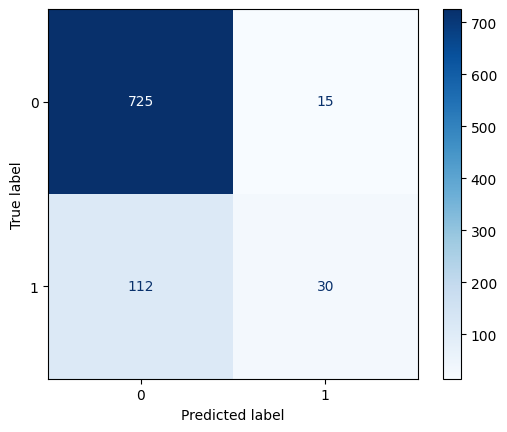

In [4720]:
log_reg = LogisticRegression(max_iter=1000,random_state=42)
results['LogisticRegression'] = TestModel(log_reg)

Accuracy:     0.8390022675736961
MAE:          0.16099773242630386
MSE:          0.16099773242630386
RMSE:         0.4012452272941123


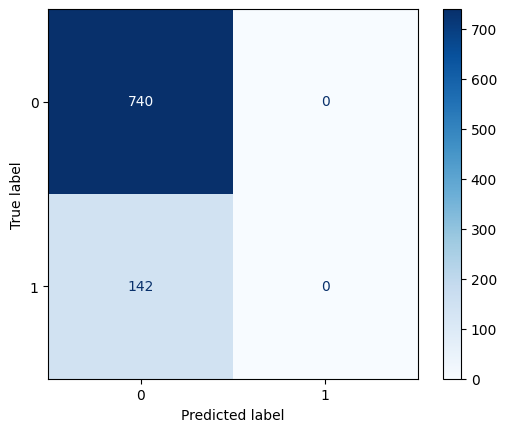

In [4721]:
svc = SVC()
results['SVC'] = TestModel(svc)

Accuracy:     0.9682539682539683
MAE:          0.031746031746031744
MSE:          0.031746031746031744
RMSE:         0.1781741612749496


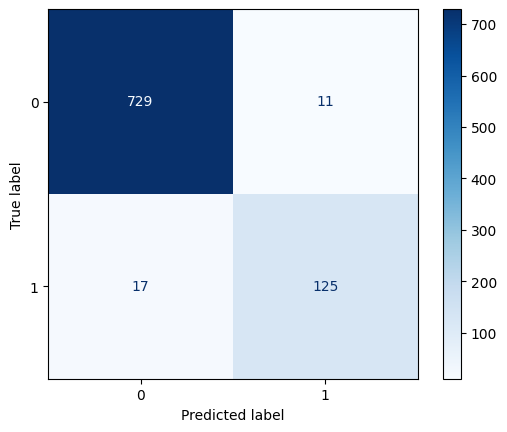

In [4723]:
dtree = DecisionTreeClassifier()
results['DecisionTree'] = TestModel(dtree)

Accuracy:     0.9784580498866213
MAE:          0.021541950113378686
MSE:          0.021541950113378686
RMSE:         0.14677176197545183


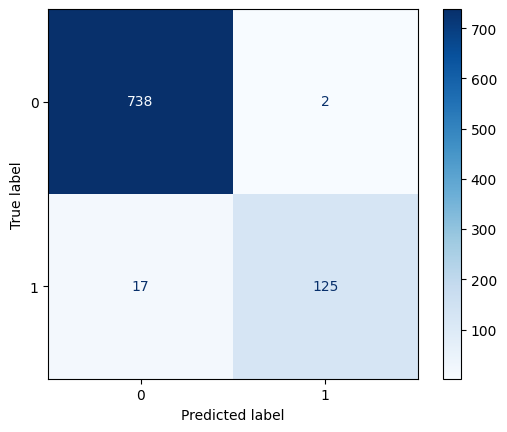

In [4722]:
rf = RandomForestClassifier()
results['RandomForest'] = TestModel(rf)

Accuracy:     0.8117913832199547
MAE:          0.18820861678004536
MSE:          0.18820861678004536
RMSE:         0.4338301704354428


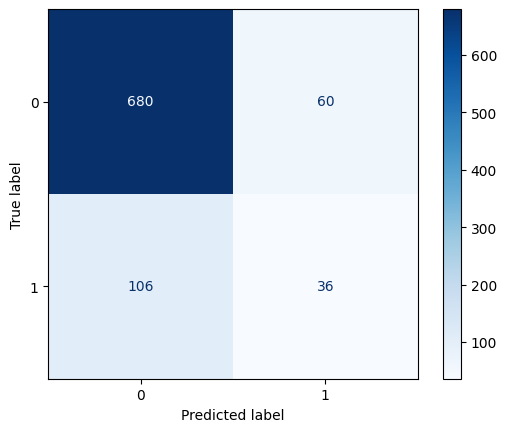

In [4724]:
knn = KNeighborsClassifier()
results['KNN'] = TestModel(knn)

In [4725]:
# not working
#ridge = Ridge()
#results['Ridge'] = TestModel(ridge)

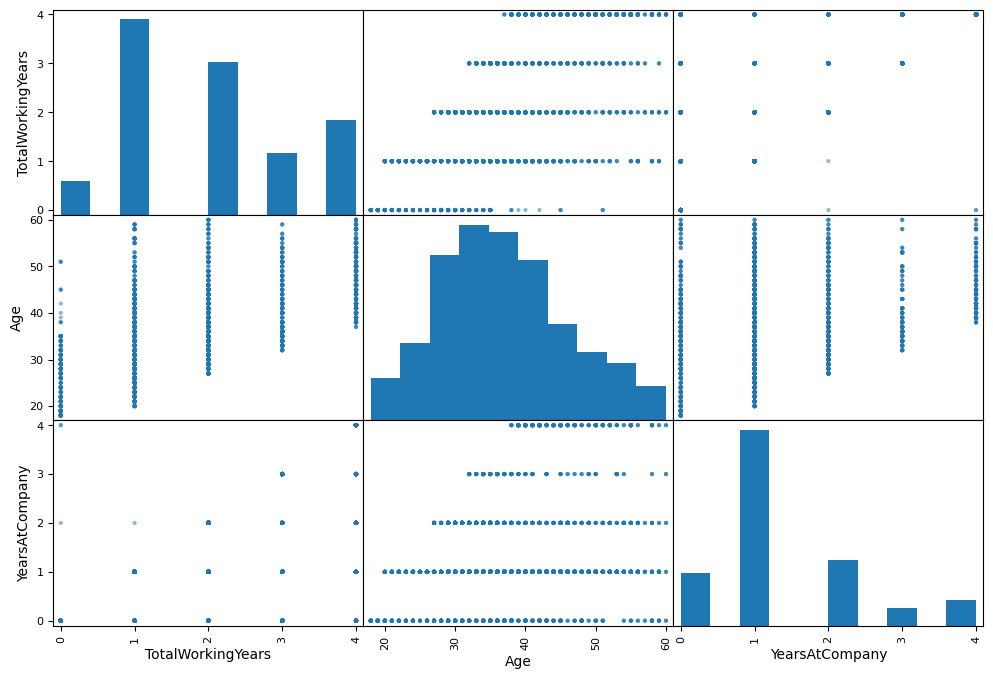

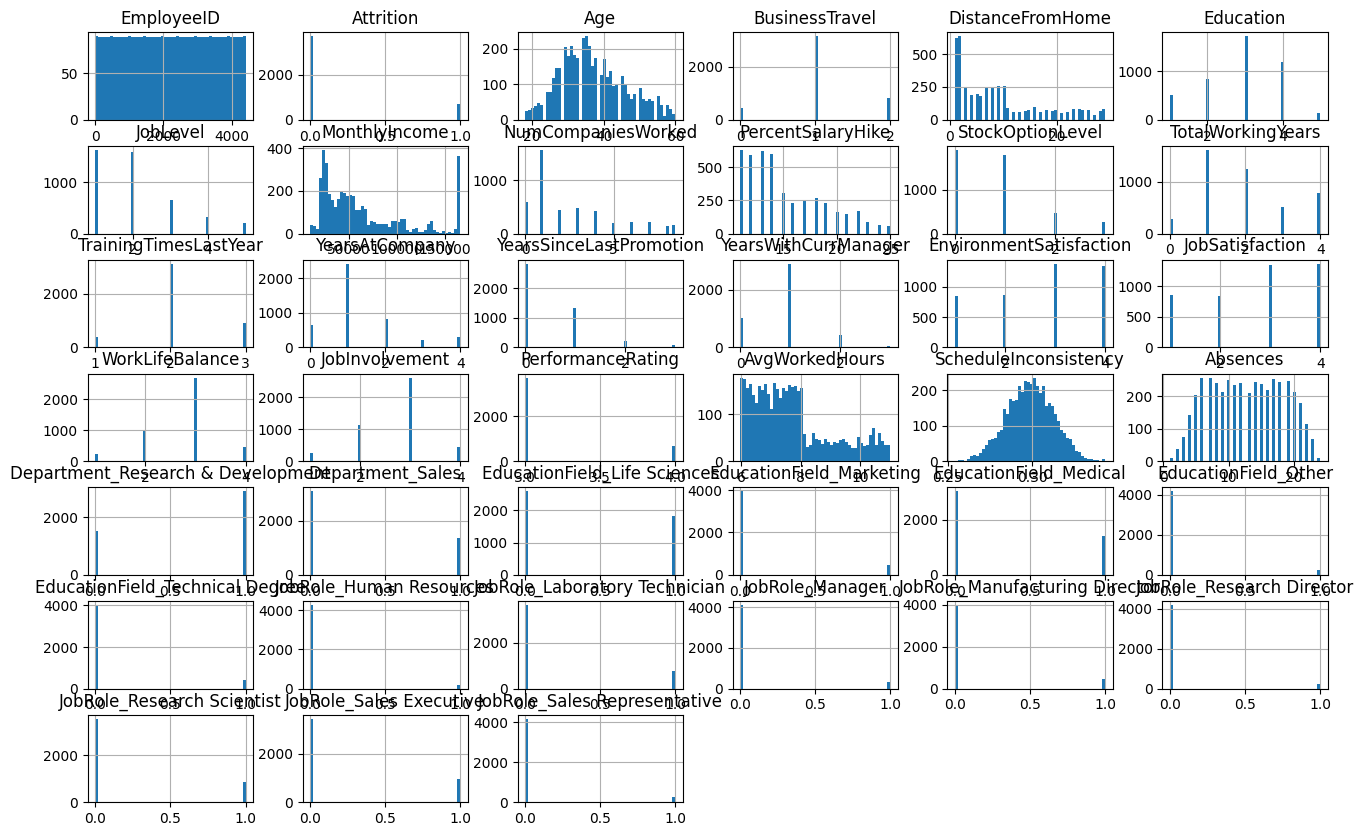

In [4726]:
attributes = ["TotalWorkingYears", "Age", "YearsAtCompany"] 
scatter_matrix(merged_df[attributes], figsize=(12, 8)) 
merged_df.hist(bins=50, figsize=(16,10))
plt.show()

### Optimizations

# Bibliography